<a href="https://colab.research.google.com/github/Praxis-QR/BDSN/blob/main/ML_Pipeline_1_Customer_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://4.bp.blogspot.com/-gbL5nZDkpFQ/XScFYwoTEII/AAAAAAAAAGY/CcVb_HDLwvs2Brv5T4vSsUcz7O4r2Q79ACK4BGAYYCw/s1600/kk3-header00-beta.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Predicting Customer Conversion with Logistic Regression

#Install

In [1]:
!pip3 -q install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Praxis').getOrCreate()

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 199 kB 48.4 MB/s 


#Load Data

In [2]:
!wget -O Data_Set.csv -q https://raw.githubusercontent.com/Praxis-QR/BDSN/main/Documents/CustomerConversion_GG.csv

In [3]:
# Load and Read the dataset
dfCusCon=spark.read.csv('Data_Set.csv',inferSchema=True,header=True)

In [4]:
# Chech the datatypes of the inputs
dfCusCon.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)



# Basic EDA :

To understand the data set and gather informations about the data

In [5]:
# Check the shape of the dataset
print((dfCusCon.count(), len(dfCusCon.columns)))

(20000, 6)


In [ ]:
# Look at the dataset using SPARK
dfCusCon.show(5)

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
+---------+---+--------------+--------+----------------+------+
only showing top 5 rows



Country and Platform are categorical and would have to be converted to numerical values

In [ ]:
# Check the statistical measures of the dataset
dfCusCon.describe().show()

+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|summary| Country|              Age|   Repeat_Visitor|Platform| Web_pages_viewed|            Status|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|  count|   20000|            20000|            20000|   20000|            20000|             20000|
|   mean|    null|         28.53955|           0.5029|    null|           9.5533|               0.5|
| stddev|    null|7.888912950773227|0.500004090187782|    null|6.073903499824976|0.5000125004687693|
|    min|  Brazil|               17|                0|    Bing|                1|                 0|
|    max|Malaysia|              111|                1|   Yahoo|               29|                 1|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+



The average age of visitors is close to 28 years, and they viewed around 9 web pages during the website visit.

In [ ]:
# Check individual columns using group By function to understand the data in deeply.
dfCusCon.groupBy('Country').count().show()

+---------+-----+
|  Country|count|
+---------+-----+
| Malaysia| 1218|
|    India| 4018|
|Indonesia|12178|
|   Brazil| 2586|
+---------+-----+



Maximum number of visitors are from Indonesia.

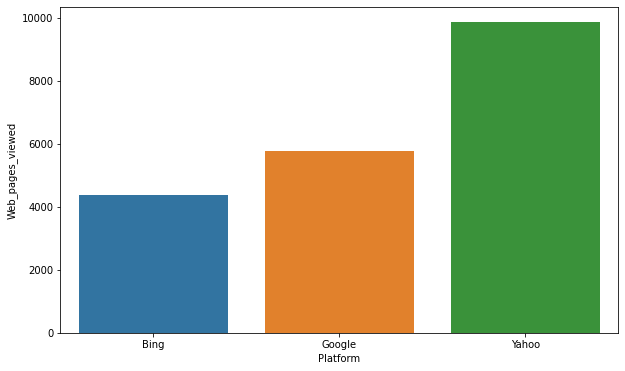

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
new_df = dfCusCon.toPandas()
plt.figure(figsize=(10,6))
sns.barplot(y = new_df.groupby('Platform').count()['Web_pages_viewed'], x = new_df.reset_index().groupby('Platform').count()['Web_pages_viewed'].index)

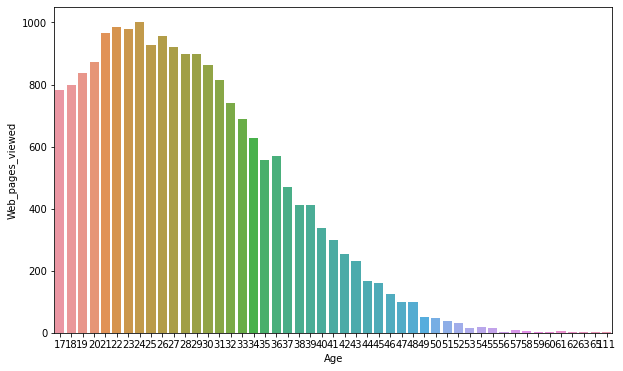

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y = new_df.groupby('Age').count()['Web_pages_viewed'], x = new_df.reset_index().groupby('Age').count()['Web_pages_viewed'].index)

In [ ]:
dfCusCon.groupBy('Platform').count().show()

+--------+-----+
|Platform|count|
+--------+-----+
|   Yahoo| 9859|
|    Bing| 4360|
|  Google| 5781|
+--------+-----+



Total numbers of Yahoo Platform users are the highest. 

In [ ]:
dfCusCon.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1|10000|
|     0|10000|
+------+-----+



Equal number of users who are converted and non-converted.

In [ ]:
 dfCusCon.groupBy('Country').mean().show()

+---------+------------------+-------------------+---------------------+--------------------+
|  Country|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|         avg(Status)|
+---------+------------------+-------------------+---------------------+--------------------+
| Malaysia|27.792282430213465| 0.5730706075533661|   11.192118226600986|  0.6568144499178982|
|    India|27.976854156296664| 0.5433051269288203|   10.727227476356397|  0.6212045793927327|
|Indonesia| 28.43159796354081| 0.5207751683363442|    9.985711939563148|  0.5422893742814913|
|   Brazil|30.274168600154677|  0.322892498066512|    4.921113689095128|0.038669760247486466|
+---------+------------------+-------------------+---------------------+--------------------+



The average number of web_page_viewed is highest in Malaysia and lowest in Brazil.

In [ ]:
dfCusCon.groupBy('Platform').mean().show()

+--------+------------------+-------------------+---------------------+------------------+
|Platform|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|       avg(Status)|
+--------+------------------+-------------------+---------------------+------------------+
|   Yahoo|28.569226087838523| 0.5094837204584644|    9.599655137437875|0.5071508266558474|
|    Bing| 28.68394495412844| 0.4720183486238532|    9.114908256880733|0.4559633027522936|
|  Google|28.380038055699707| 0.5149628092025601|    9.804878048780488|0.5210171250648676|
+--------+------------------+-------------------+---------------------+------------------+



The average number of web_page_viewed is highest for Google Platform.

In [ ]:
dfCusCon.groupBy('Status').mean().show()

+------+--------+-------------------+---------------------+-----------+
|Status|avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|avg(Status)|
+------+--------+-------------------+---------------------+-----------+
|     1| 26.5435|             0.7019|              14.5617|        1.0|
|     0| 30.5356|             0.3039|               4.5449|        0.0|
+------+--------+-------------------+---------------------+-----------+



There is a strong connection between the conversion 
status and the number of Web_pages_viewed along with repeat_Visitor.

# Feature Engineering :

Converting the Data for ML purposes<br>
see https://spark.apache.org/docs/latest/ml-features.html

In [6]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.classification import LogisticRegression

##Platform Data

In [7]:
#Platform_indexer = StringIndexer(inputCol="Platform", outputCol="Platform_Num").fit(df)
Platform_indexer = StringIndexer(inputCol="Platform", outputCol="Platform_Num")
dfWork = Platform_indexer.fit(dfCusCon).transform(dfCusCon)
#dfWork.show(5,False)
dfWork.show(5)

+---------+---+--------------+--------+----------------+------+------------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Platform_Num|
+---------+---+--------------+--------+----------------+------+------------+
|    India| 41|             1|   Yahoo|              21|     1|         0.0|
|   Brazil| 28|             1|   Yahoo|               5|     0|         0.0|
|   Brazil| 40|             0|  Google|               3|     0|         1.0|
|Indonesia| 31|             1|    Bing|              15|     1|         2.0|
| Malaysia| 32|             0|  Google|              15|     1|         1.0|
+---------+---+--------------+--------+----------------+------+------------+
only showing top 5 rows



In [8]:
dfWork.groupBy('Platform').count().orderBy('count', ascending=False).show(5)

+--------+-----+
|Platform|count|
+--------+-----+
|   Yahoo| 9859|
|  Google| 5781|
|    Bing| 4360|
+--------+-----+



In [ ]:
dfWork.groupBy('Platform_Num').count().orderBy('count', ascending=False).show(5)

+------------+-----+
|Platform_Num|count|
+------------+-----+
|         0.0| 9859|
|         1.0| 5781|
|         2.0| 4360|
+------------+-----+



In [9]:
Platform_encoder = OneHotEncoder(inputCol="Platform_Num", outputCol="Platforms_Vector")
Platform_encoder.setDropLast(False)        #setDropLast : https://stackoverflow.com/questions/39500213/why-does-sparks-onehotencoder-drop-the-last-category-by-default
#ohe = Platform_encoder.fit(df)
dfWork = Platform_encoder.fit(dfWork).transform(dfWork)
dfWork.show(5)

+---------+---+--------------+--------+----------------+------+------------+----------------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Platform_Num|Platforms_Vector|
+---------+---+--------------+--------+----------------+------+------------+----------------+
|    India| 41|             1|   Yahoo|              21|     1|         0.0|   (3,[0],[1.0])|
|   Brazil| 28|             1|   Yahoo|               5|     0|         0.0|   (3,[0],[1.0])|
|   Brazil| 40|             0|  Google|               3|     0|         1.0|   (3,[1],[1.0])|
|Indonesia| 31|             1|    Bing|              15|     1|         2.0|   (3,[2],[1.0])|
| Malaysia| 32|             0|  Google|              15|     1|         1.0|   (3,[1],[1.0])|
+---------+---+--------------+--------+----------------+------+------------+----------------+
only showing top 5 rows



In [ ]:
dfWork.groupBy('Platforms_Vector').count().orderBy('count', ascending=False).show(5,False)

+----------------+-----+
|Platforms_Vector|count|
+----------------+-----+
|(3,[0],[1.0])   |9859 |
|(3,[1],[1.0])   |5781 |
|(3,[2],[1.0])   |4360 |
+----------------+-----+



##Country Data

In [10]:
#Country_indexer = StringIndexer(inputCol="Country", outputCol="Country_Num").fit(df)
Country_indexer = StringIndexer(inputCol="Country", outputCol="Country_Num")
dfWork = Country_indexer.fit(dfWork).transform(dfWork)
dfWork.show(5)

+---------+---+--------------+--------+----------------+------+------------+----------------+-----------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Platform_Num|Platforms_Vector|Country_Num|
+---------+---+--------------+--------+----------------+------+------------+----------------+-----------+
|    India| 41|             1|   Yahoo|              21|     1|         0.0|   (3,[0],[1.0])|        1.0|
|   Brazil| 28|             1|   Yahoo|               5|     0|         0.0|   (3,[0],[1.0])|        2.0|
|   Brazil| 40|             0|  Google|               3|     0|         1.0|   (3,[1],[1.0])|        2.0|
|Indonesia| 31|             1|    Bing|              15|     1|         2.0|   (3,[2],[1.0])|        0.0|
| Malaysia| 32|             0|  Google|              15|     1|         1.0|   (3,[1],[1.0])|        3.0|
+---------+---+--------------+--------+----------------+------+------------+----------------+-----------+
only showing top 5 rows



In [ ]:
dfWork.groupBy('Country').count().orderBy('count', ascending = False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|12178|
|India    |4018 |
|Brazil   |2586 |
|Malaysia |1218 |
+---------+-----+



In [ ]:
dfWork.groupBy('Country_Num').count().orderBy('count', ascending = False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |12178|
|1.0        |4018 |
|2.0        |2586 |
|3.0        |1218 |
+-----------+-----+



In [11]:
Country_encoder =OneHotEncoder(inputCol="Country_Num", outputCol="Country_Vector")
Country_encoder.setDropLast(False)
#ohhe = Country_encoder.fit(df)
dfWork = Country_encoder.fit(dfWork).transform(dfWork)

In [ ]:
dfWork.select(['Country','Country_Num','Country_Vector']).show(5)

+---------+-----------+--------------+
|  Country|Country_Num|Country_Vector|
+---------+-----------+--------------+
|    India|        1.0| (4,[1],[1.0])|
|   Brazil|        2.0| (4,[2],[1.0])|
|   Brazil|        2.0| (4,[2],[1.0])|
|Indonesia|        0.0| (4,[0],[1.0])|
| Malaysia|        3.0| (4,[3],[1.0])|
+---------+-----------+--------------+
only showing top 5 rows



In [ ]:
dfWork.groupBy('Country_Vector').count().orderBy('count', ascending = False).show(5,False)

+--------------+-----+
|Country_Vector|count|
+--------------+-----+
|(4,[0],[1.0]) |12178|
|(4,[1],[1.0]) |4018 |
|(4,[2],[1.0]) |2586 |
|(4,[3],[1.0]) |1218 |
+--------------+-----+



Categoricals have been converted into Numericals.<br>
Now to Create the Feature Vector

In [12]:
# Now it is needed to assemble all of the input columns into a single vector that would act as the input feature for the Logistic Regression model.
Feature_assembler = VectorAssembler(inputCols=['Platforms_Vector','Country_Vector','Age', 'Repeat_Visitor', 
'Web_pages_viewed'], outputCol="features")
dfWork = Feature_assembler.transform(dfWork)
dfWork.show(5)

+---------+---+--------------+--------+----------------+------+------------+----------------+-----------+--------------+--------------------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Platform_Num|Platforms_Vector|Country_Num|Country_Vector|            features|
+---------+---+--------------+--------+----------------+------+------------+----------------+-----------+--------------+--------------------+
|    India| 41|             1|   Yahoo|              21|     1|         0.0|   (3,[0],[1.0])|        1.0| (4,[1],[1.0])|(10,[0,4,7,8,9],[...|
|   Brazil| 28|             1|   Yahoo|               5|     0|         0.0|   (3,[0],[1.0])|        2.0| (4,[2],[1.0])|(10,[0,5,7,8,9],[...|
|   Brazil| 40|             0|  Google|               3|     0|         1.0|   (3,[1],[1.0])|        2.0| (4,[2],[1.0])|(10,[1,5,7,9],[1....|
|Indonesia| 31|             1|    Bing|              15|     1|         2.0|   (3,[2],[1.0])|        0.0| (4,[0],[1.0])|(10,[2,3,7,8,9],[...|
| Mala

In [ ]:
dfWork[['features','Status']].show(5,False)

+----------------------------------------+------+
|features                                |Status|
+----------------------------------------+------+
|(10,[0,4,7,8,9],[1.0,1.0,41.0,1.0,21.0])|1     |
|(10,[0,5,7,8,9],[1.0,1.0,28.0,1.0,5.0]) |0     |
|(10,[1,5,7,9],[1.0,1.0,40.0,3.0])       |0     |
|(10,[2,3,7,8,9],[1.0,1.0,31.0,1.0,15.0])|1     |
|(10,[1,6,7,9],[1.0,1.0,32.0,15.0])      |1     |
+----------------------------------------+------+
only showing top 5 rows



In [ ]:
dfWork.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Platform_Num: double (nullable = false)
 |-- Platforms_Vector: vector (nullable = true)
 |-- Country_Num: double (nullable = false)
 |-- Country_Vector: vector (nullable = true)
 |-- features: vector (nullable = true)



One extra column named features, which is nothing but a combination of all the input features represented as a Single Dense Vector.

## Reducing the DataSet

In [13]:
# Now select only features column as input and the Status column as output for training the logistic regression model.
#model_df=df.select(['features','Status'])
dfWork = dfWork.select(['features','Status'])
dfWork.show(10, False)

+----------------------------------------+------+
|features                                |Status|
+----------------------------------------+------+
|(10,[0,4,7,8,9],[1.0,1.0,41.0,1.0,21.0])|1     |
|(10,[0,5,7,8,9],[1.0,1.0,28.0,1.0,5.0]) |0     |
|(10,[1,5,7,9],[1.0,1.0,40.0,3.0])       |0     |
|(10,[2,3,7,8,9],[1.0,1.0,31.0,1.0,15.0])|1     |
|(10,[1,6,7,9],[1.0,1.0,32.0,15.0])      |1     |
|(10,[1,5,7,9],[1.0,1.0,32.0,3.0])       |0     |
|(10,[1,5,7,9],[1.0,1.0,32.0,6.0])       |0     |
|(10,[1,3,7,9],[1.0,1.0,27.0,9.0])       |0     |
|(10,[0,3,7,9],[1.0,1.0,32.0,2.0])       |0     |
|(10,[2,3,7,8,9],[1.0,1.0,31.0,1.0,16.0])|1     |
+----------------------------------------+------+
only showing top 10 rows



## Splitting the Dataset :

Split the dataset into a training and test dataset in order to train and evaluate the performance of the logistic regression model. I split it in a 75/25 ratio and train our model on 75% of the dataset.

In [14]:
dfTrain, dfTest = dfWork.randomSplit([0.75,0.25])
print( dfTrain.count(), dfTest.count())

15032 4968


In [ ]:
dfTrain.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 7492|
|     0| 7485|
+------+-----+



This ensures we have a balance set of the target class (Status) into the 
training and test set.

In [ ]:
dfTest.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 2508|
|     0| 2515|
+------+-----+



## Build and Train Logistic Regression Model:

I build and train the logistic regression model using features as the input column and status as the output column.

In [15]:
#LogReg =LogisticRegression(labelCol='Status').fit(training_df)
LogReg =LogisticRegression(labelCol='Status')

## Training Results:

We can  access the predictions made by the model using the evaluate function in SPARK that executes all the steps in an optimized way. It gives another Dataframe that contains four columns in total, including prediction and probability.

In [16]:
TrainResults =LogReg.fit(dfTrain).evaluate(dfTrain).predictions

In [17]:
TrainResults.count()

15032

In [18]:
TrainResults.filter(TrainResults['Status']==1).filter(TrainResults['prediction']==1).select(['Status','prediction','probability']).show(10,False)

+------+----------+----------------------------------------+
|Status|prediction|probability                             |
+------+----------+----------------------------------------+
|1     |1.0       |[0.42947909053396277,0.5705209094660373]|
|1     |1.0       |[0.2615738641998393,0.7384261358001607] |
|1     |1.0       |[0.2615738641998393,0.7384261358001607] |
|1     |1.0       |[0.2615738641998393,0.7384261358001607] |
|1     |1.0       |[0.14287275467802177,0.8571272453219783]|
|1     |1.0       |[0.14287275467802177,0.8571272453219783]|
|1     |1.0       |[0.07273210718674555,0.9272678928132545]|
|1     |1.0       |[0.07273210718674555,0.9272678928132545]|
|1     |1.0       |[0.07273210718674555,0.9272678928132545]|
|1     |1.0       |[0.07273210718674555,0.9272678928132545]|
+------+----------+----------------------------------------+
only showing top 10 rows



## Evaluate Logistic Regression Model on Test Data

Now check the performance of the 
model on test data. So the evaluate function is used, to make predictions on the test data.

In [19]:
#results=log_reg.evaluate(test_df).predictions
TestResults = LogReg.fit(dfTrain).evaluate(dfTest).predictions

In [20]:
TestResults.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Status: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
TestResults.select(['Status','prediction']).show(10,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|1     |0.0       |
|1     |1.0       |
|1     |1.0       |
|0     |1.0       |
|1     |1.0       |
|1     |1.0       |
|1     |1.0       |
+------+----------+
only showing top 10 rows



### Confusion Matrix:

As this is a classification problem, I use a confusion matrix to 
gauge the performance of the model.

In [ ]:
tp = TestResults[(TestResults.Status == 1) & (TestResults.prediction == 1)].count()
tn = TestResults[(TestResults.Status == 0) & (TestResults.prediction == 0)].count()
fp = TestResults[(TestResults.Status == 0) & (TestResults.prediction == 1)].count()
fn = TestResults[(TestResults.Status == 1) & (TestResults.prediction == 0)].count()

### Accuracy:

It is the most basic metric for evaluating any classifier.

In [ ]:
accuracy=float((tp+tn) /(TestResults.count()))
print('Accuracy = ',accuracy)

Accuracy =  0.9376866414493331


### Recall:

Recall rate shows how much of the positive class cases we are able to predict correctly out of the total positive class observations.

In [ ]:
recall = float(tp)/(tp + fn)
print('Recall = ',recall)

Recall =  0.9354066985645934


### Precision:

Precision rate talks about the number of true positives predicted correctly out of all the predicted positives observations.

In [ ]:
precision = float(tp) / (tp + fp)
print('Precision = ',precision)

Precision =  0.9395274329195034


#Pipeline

In [21]:
from pyspark.ml import Pipeline

In [ ]:
dfCusCon.show(5,False)

+---------+---+--------------+--------+----------------+------+
|Country  |Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|India    |41 |1             |Yahoo   |21              |1     |
|Brazil   |28 |1             |Yahoo   |5               |0     |
|Brazil   |40 |0             |Google  |3               |0     |
|Indonesia|31 |1             |Bing    |15              |1     |
|Malaysia |32 |0             |Google  |15              |1     |
+---------+---+--------------+--------+----------------+------+
only showing top 5 rows



In [24]:
dfTrainP, dfTestP = dfCusCon.randomSplit([0.75,0.25])
print( dfTrainP.count(), dfTestP.count())

14836 5164


In [22]:
Platform_indexer = StringIndexer(inputCol="Platform", outputCol="Platform_Num")
Platform_encoder = OneHotEncoder(inputCol="Platform_Num", outputCol="Platforms_Vector")
Platform_encoder.setDropLast(False)
Country_indexer = StringIndexer(inputCol="Country", outputCol="Country_Num")   
Country_encoder = OneHotEncoder(inputCol="Country_Num", outputCol="Country_Vector")
Country_encoder.setDropLast(False) 
Feature_assembler = VectorAssembler(inputCols=['Platforms_Vector','Country_Vector','Age', 'Repeat_Visitor','Web_pages_viewed'], outputCol="features")  
LogReg =LogisticRegression(labelCol='Status',featuresCol='features')

In [25]:
mlPipeLine = Pipeline(stages=[Platform_indexer,Platform_encoder, Country_indexer, Country_encoder, Feature_assembler,LogReg])
# training model pipeline with data
mlModel = mlPipeLine.fit(dfTrainP)
TestResults = mlModel.transform(dfTestP)

In [26]:
TestResults.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Platform_Num: double (nullable = false)
 |-- Platforms_Vector: vector (nullable = true)
 |-- Country_Num: double (nullable = false)
 |-- Country_Vector: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
TestResults.select(['Status','prediction']).show(10,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
+------+----------+
only showing top 10 rows



## Confusion Matrix

In [27]:
tp = TestResults[(TestResults.Status == 1) & (TestResults.prediction == 1)].count()
tn = TestResults[(TestResults.Status == 0) & (TestResults.prediction == 0)].count()
fp = TestResults[(TestResults.Status == 0) & (TestResults.prediction == 1)].count()
fn = TestResults[(TestResults.Status == 1) & (TestResults.prediction == 0)].count()

## Accuracy

In [ ]:
accuracy_P=float((tp+tn) /(TestResults.count()))
print('Accuracy with Pipeline = ',accuracy_P)

Accuracy with Pipeline =  0.9405448399284152


## Recall

In [ ]:
recall_P = float(tp)/(tp + fn)
print('Recall with Pipeline = ',recall_P)

Recall with Pipeline =  0.9366028708133971


##Precision

In [ ]:
precisionP = float(tp) / (tp + fp)
print('Precision with Pipeline = ',precisionP)

Precision with Pipeline =  0.9437525110486139


#Comparison

In [ ]:
print('Accuracy  :', round(accuracy_P,2), ' (with Pipeline) ', round(accuracy,2),' (without)')
print('Recall    :', round(recall_P,2), ' (with Pipeline) ', round(recall,2),' (without)')
print('Precision :', round(precisionP,2), ' (with Pipeline) ', round(precision,2),' (without)')

Accuracy  : 0.94  (with Pipeline)  0.94  (without)
Recall    : 0.94  (with Pipeline)  0.94  (without)
Precision : 0.94  (with Pipeline)  0.94  (without)


In [28]:
!date

Sun Oct 16 06:19:19 UTC 2022


#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEg8qElM73l6qtmIS1VTUgsLLhyoGnbWGDq8g-v-g2iW1xr-IRr7FT9WW4tnKDY2sE1rJKPl7sp_p_f6ipEs-__eYU7V0SRuoLlhkopL063bEPqUTiC4lrM4toFMgaf7kpxE2m5niHwn7jZwb9ktv8OdO7OIwPL9xyyF-SiSuQE2SRemLVQRCalwDnQgdg/s16000/CTCYFooter-1.png)